<a href="https://colab.research.google.com/github/AlexKressner/Business_Intelligence/blob/main/ML_Klassifikation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Klassifikation, Beispiel Diabetes
Im nachfolgenden Beispiel werden wir ein ML-Verfahren einsetzen, um anhand von Untersuchungsergebnissen vorherzusagen, ob ein Patient Diabetes hat. Es handelt sich dabei um eine Klassifikationsproblem (Diabetes/ keine Diabetes). Wir verwenden einen Datensatz mit folgenden Informationen:
1. Anzahl Schwangerschaften
1. Glukosekonzentration nach Glukosetoleranztest
1. Blutdruck (mm Hg)
1. Dicke der Trizepshautfalte (mm)
1. Insulinwert (mu U/ml)
1. Body mass index
1. Diabetesvorbelastungsfunktion
1. Alter (Jahre)
1. Diabetes (0/1)

## 1 Daten laden

In [ ]:
import pandas as pd

In [ ]:
#! git clone https://github.com/AlexKressner/Business_Intelligence

In [ ]:
path = "Business_Intelligence/Daten/ML_Klassifikation/"

In [ ]:
# Daten laden
data = pd.read_csv(f"{path}diabetes.txt")

In [ ]:
data.dtypes

## 2 Datensatz in Features und Target teilen

Wie bereits zuvor müssen wir unterscheiden, was vorhergesagt werden soll (**Target**) und welche Merkmale dazu genutzt werden sollen (**Features**).

In [ ]:
# Features, d.h. womit lässt sich Diabetes prognostizeren!
X = data.drop(columns="diabetes")
X.head()

In [ ]:
# Target, d.h. was soll prognostiziert werden!
y = data["diabetes"]
y.head()

## 2.2 Datensatz in Trainings- und Testmenge aufteilen
Erneut müssen wir die Daten aufteilen. Da wir ausschließlich mit numerischen Daten arbeiten, müssen wir keine Datenaufbereitung über `pd.get_dummies` vornehmen.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X und y werden in Trainings- und Testmenge aufgeteilt, so dass die Testmenge 20% der vorhandenen Daten hat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
y_train.head()

In [ ]:
X_train.head()

## 2.3 Modell auswählen

Erneut verwenden wir das Verfahren `Random Forest`. Sie müssen allerdings darauf achten, dass Sie einen Random Forest zur Klassifikation importieren. Aus diesem Grund verwenden wir das Verfahren `RandomForestClassifier`. Für die Regressionaufgabe hatten wir das Verfahren `RandomForestRegressor` genutzt. Achten Sie auf diesen wichtigen Unterschied!

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

## 2.4 Modell trainieren

Das Random Forest Verfahren versucht nun einen Zusammenhang zwischen den Features und dem Target zu lernen und minimiert dabei ein Fehlermaß. Letzteres misst den Grad der Fehlklassifikation. Beispiel für Fehlklassifikation: Das Modell prognostiziert Diabetes für einen Patienten, in der Realität liegt die Erkrankung aber nicht vor.

In [ ]:
model.fit(X_train, y_train)

## 2.5 Modell anwenden

Das ML-Verfahren erhält die Daten `X_test`, d.h. die Untersuchungsergebnisse mit den relevanten Merkmalen und wendet die gelernten Zusammenhänge zur Prognose des Targets an, d.h. dem Vorhandensein von Diabetes (0/1)!

In [ ]:
X_test.head()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test.values

In [ ]:
pd.DataFrame({"Vorhersage":pd.Series(y_pred), "Beobachtung":pd.Series(y_test.values)},).head(10)

## 2.6 Modell evaluieren

Die Modellbewertung erfolgt bei der Klassifikation regelmäßg nach dem Kriterium der "Accuracy" (andere kommen aber auch zum Einsatz). Die Accuracy setzt die Anzahl der korrekten Klassifikation in das Verhältnis zur Anzahl aller Beobachtungen. Dementsprechend stellt sie den Anteil der korrekten Klassifikationen dar.

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
metrics.accuracy_score(y_test, y_pred) * 100

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()

# Übungsaufgabe
Das Versinken der Titanic ist eines der berüchtigtsten Schiffsunglücke in der Geschichte.

Am 15. April 1912, während ihrer Jungfernfahrt, sank die weithin als „unsinkbar“ betrachtete RMS Titanic, nachdem sie mit einem Eisberg kollidiert war. Leider gab es nicht genügend Rettungsboote für alle an Bord, was zum Tod von 1502 der 2224 Passagiere und Besatzungsmitglieder führte.

Obwohl beim Überleben auch ein Element des Glücks eine Rolle spielte, scheint es, dass einige Gruppen von Menschen eine höhere Überlebenschance hatten als andere.

Erstellen Sie bitte ein Vorhersagemodell, das die Frage beantwortet: „Welche Art von Personen hatten eine höhere Überlebenschance?“ unter Verwendung von Passagierdaten (z.B. Name, Alter, Geschlecht, sozioökonomische Klasse usw.).

Die Daten finden Sie in der Datei `titanic.csv`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"Daten\ML_Klassifikation\titanic.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=["Name", "Ticket", "Cabin","PassengerId", "Fare"], inplace=True)


In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
TARGET = ["Survived"]
FEATURES = ["Pclass", "Sex", "Age", "Parch", "Embarked"]

In [7]:
category_features = ["Pclass","Sex", "Embarked"]
numeric_features = ["Age", "Parch", "SibSp"]

In [8]:
for feature in category_features:
    df[feature] = df[feature].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Embarked  889 non-null    category
dtypes: category(3), float64(1), int64(3)
memory usage: 31.0 KB


C:\Users\florian.wolff\AppData\Local\Temp\ipykernel_17516\2963806393.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", cbar=False)


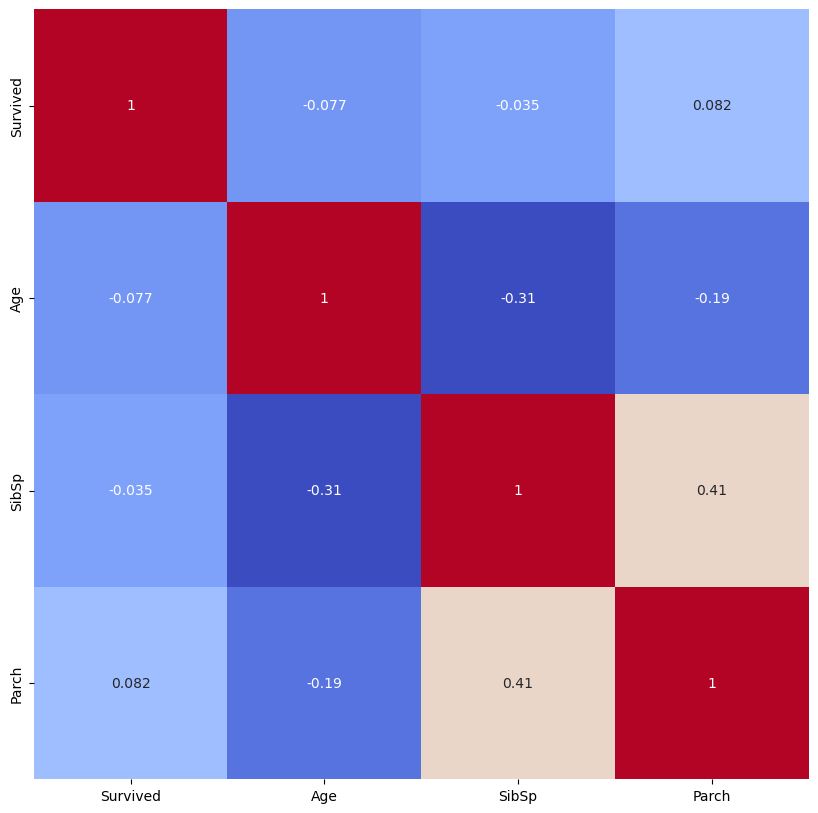

In [9]:
# Visualize correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", cbar=False)
plt.show()

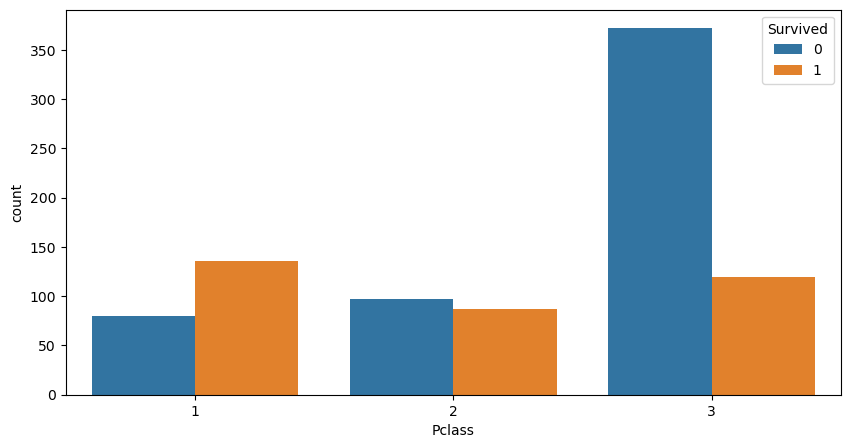

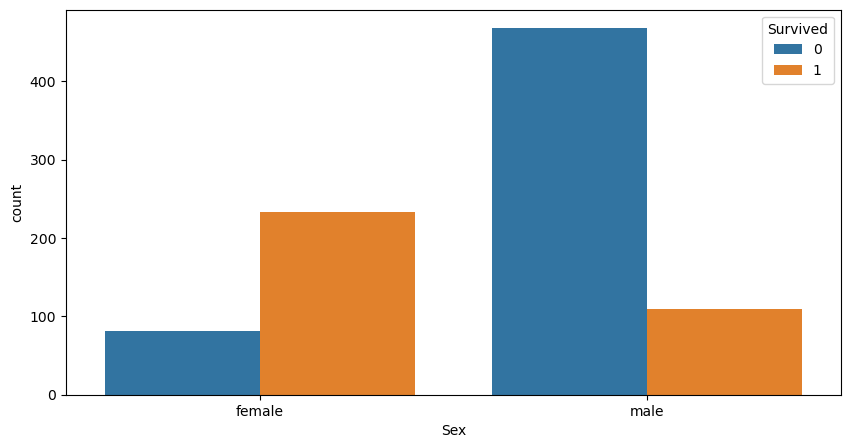

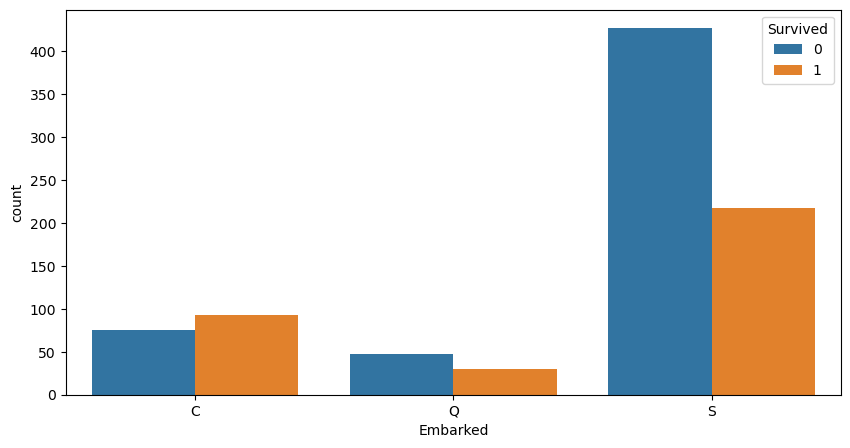

In [10]:
# Visualize distribution of categoical features

for feature in category_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue="Survived")
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import (
    make_scorer,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
    )
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from lightgbm import LGBMClassifier

In [12]:
X = df.drop(columns=TARGET)
y = df[TARGET]

print(X.head(),"\n", y.head())

  Pclass     Sex   Age  SibSp  Parch Embarked
0      3    male  22.0      1      0        S
1      1  female  38.0      1      0        C
2      3  female  26.0      0      0        S
3      1  female  35.0      1      0        S
4      3    male  35.0      0      0        S 
    Survived
0         0
1         1
2         1
3         1
4         0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMClassifier()

onhot = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[("onehot", onhot, category_features)], remainder="passthrough", verbose_feature_names_out=True).fit(X_train)


scoring = {
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "accuracy": make_scorer(accuracy_score),
    "roc_accuracy": make_scorer(roc_auc_score),
}


In [14]:
# No changes in the code, it should work as expected
scores = cross_validate(
    model, preprocessor.transform(X_train), y_train, cv=5, scoring=scoring, n_jobs=-1
)

print(f"\nResults for LightGBM:\n")
print(
    f'Precision: {scores["test_precision"].mean():.4f}'
)  # accuracy of positve -> high cost false positives
print(
    f'Recall: {scores["test_recall"].mean():.4f}'
)  # Sensitivity to capture all positive instances -> high cost missing positives
print(f'F1 Score: {scores["test_f1"].mean():.4f}')  # Combines precision and recall
print(
    f'Accuracy: {scores["test_accuracy"].mean():.4f}'
)  # ability to distinguish between classes (how sure ist the model of predicted value)
print(f'Roc_Accuracy: {scores["test_roc_accuracy"].mean():.4f}')


Results for LightGBM:

Precision: 0.8034
Recall: 0.6937
F1 Score: 0.7431
Accuracy: 0.8202
Roc_Accuracy: 0.7950


In [15]:
# Hyperparameter tuning for LightGBM

from sklearn.model_selection import GridSearchCV


param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 5, 7],
    "num_leaves": [31, 127, 255],
}

scoring = {"accuracy": "accuracy", "roc_auc": make_scorer(roc_auc_score)}

grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring=scoring, refit="roc_auc", n_jobs=-1
)
grid_search.fit(preprocessor.transform(X_train), y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(

    f'Best cross-validated accuracy: {grid_search.cv_results_["mean_test_accuracy"][grid_search.best_index_]:.4f}'

)

print(

    f'Best cross-validated ROC-AUC: {grid_search.cv_results_["mean_test_roc_auc"][grid_search.best_index_]:.4f}'

)

c:\Users\florian.wolff\AppData\Local\anaconda3\envs\isg_data_science\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\florian.wolff\AppData\Local\anaconda3\envs\isg_data_science\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [30]:
import optuna

def objective(trial: optuna.Trial):
    boosting_type = trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"])
    bagging_fraction = 1.0 if boosting_type == "goss" else trial.suggest_float("bagging_fraction", 0.4, 1.0)
    
    param = {
        "objective": trial.suggest_categorical("objective", ["binary", "cross_entropy"]),
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": boosting_type,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": bagging_fraction,
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
        "min_split_gain": trial.suggest_float("min_split_gain", 0.0, 1.0),
        "subsample": trial.suggest_float("subsample", 0.4, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
    }
    
    scoring = {"accuracy": "accuracy", "roc_auc": make_scorer(roc_auc_score)}
    
    classifier = LGBMClassifier(random_state=42, **param)
    
    scores = cross_validate(
        classifier, preprocessor.transform(X_train), y_train, cv=5, scoring=scoring, n_jobs=-1
    )
    roc_auc = scores['test_roc_auc'].mean()
    
    return roc_auc

study = optuna.create_study(direction="maximize")
    
study.optimize(objective, n_trials=100)

best_scores = study.best_trial.value
best_params = study.best_params

print(f"Best parameters: {best_params}")
print(f"Best cross-validated ROC-AUC: {best_scores:.4f}")



[I 2024-02-09 09:30:51,341] A new study created in memory with name: no-name-3d2d3fef-7280-49be-a99a-33d68970d8fa
[I 2024-02-09 09:30:51,557] Trial 0 finished with value: 0.7768337658972596 and parameters: {'boosting_type': 'gbdt', 'bagging_fraction': 0.7430771212452068, 'objective': 'cross_entropy', 'lambda_l1': 1.34294023459976e-07, 'lambda_l2': 0.00011166072234637481, 'num_leaves': 97, 'feature_fraction': 0.6320479579599302, 'bagging_freq': 1, 'min_child_samples': 33, 'learning_rate': 0.2811170487921273, 'max_depth': 6, 'min_data_in_leaf': 85, 'min_split_gain': 0.08410710824636136, 'subsample': 0.9056962430161771, 'subsample_freq': 6}. Best is trial 0 with value: 0.7768337658972596.
[I 2024-02-09 09:30:51,792] Trial 1 finished with value: 0.7573250614404949 and parameters: {'boosting_type': 'dart', 'bagging_fraction': 0.6280575176373616, 'objective': 'binary', 'lambda_l1': 4.081875652744229e-07, 'lambda_l2': 0.015002082409622995, 'num_leaves': 171, 'feature_fraction': 0.921182104472

Best parameters: {'boosting_type': 'dart', 'bagging_fraction': 0.7109382757674573, 'objective': 'binary', 'lambda_l1': 4.280716944705774e-06, 'lambda_l2': 7.633396087193554e-05, 'num_leaves': 163, 'feature_fraction': 0.8704422862186209, 'bagging_freq': 5, 'min_child_samples': 9, 'learning_rate': 0.16880114191534762, 'max_depth': 8, 'min_data_in_leaf': 10, 'min_split_gain': 0.20866288443090886, 'subsample': 0.5445229534034256, 'subsample_freq': 1}
Best cross-validated ROC-AUC: 0.8093


In [31]:
X_test_transformed = preprocessor.transform(X_test)
test_accuracy = grid_search.score(X_test_transformed, y_test)
test_roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test_transformed)[:, 1])

print("GridSearchCV best model")
print(f"Test set accuracy: {test_accuracy:.4f}")
print(f"Test set ROC-AUC: {test_roc_auc:.4f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
GridSearchCV best model
Test set accuracy: 0.8463
Test set ROC-AUC: 0.8642


In [33]:
best_model = LGBMClassifier(**best_params).fit(preprocessor.transform(X_train), y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8704422862186209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8704422862186209
[LightGBM] [Warning] lambda_l1 is set=4.280716944705774e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.280716944705774e-06
[LightGBM] [Warning] lambda_l2 is set=7.633396087193554e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.633396087193554e-05
[LightGBM] [Warning] bagging_fraction is set=0.7109382757674573, subsample=0.5445229534034256 will be ignored. Current value: bagging_fraction=0.7109382757674573
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.87044228

c:\Users\florian.wolff\AppData\Local\anaconda3\envs\isg_data_science\Lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\florian.wolff\AppData\Local\anaconda3\envs\isg_data_science\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [34]:
# best model
data_preprocessed = preprocessor.transform(X_test)
y_prediction = best_model.predict(data_preprocessed)
y_prediction_proba = best_model.predict_proba(data_preprocessed)[:, 1]
cm = confusion_matrix(y_true=y_test, y_pred=y_prediction, labels=best_model.classes_)
print(f"Test set accuracy: {accuracy_score(y_test, y_prediction):.4f}")
print(f"Test set precision: {precision_score(y_test, y_prediction):.4f}")
print(f"Test set recall: {recall_score(y_test, y_prediction):.4f}")
print(f"Test set F1: {f1_score(y_test, y_prediction):.4f}")
print(f"Test set ROC-AUC: {roc_auc_score(y_test, y_prediction_proba):.4f}\n")
print(f"Classification Report:\n{classification_report(y_test, y_prediction)}\n\n")

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.8704422862186209, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8704422862186209
[LightGBM] [Warning] lambda_l1 is set=4.280716944705774e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.280716944705774e-06
[LightGBM] [Warning] lambda_l2 is set=7.633396087193554e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.633396087193554e-05
[LightGBM] [Warning] bagging_fraction is set=0.7109382757674573, subsample=0.5445229534034256 will be ignored. Current value: bagging_fraction=0.7109382757674573
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=9 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.87044228

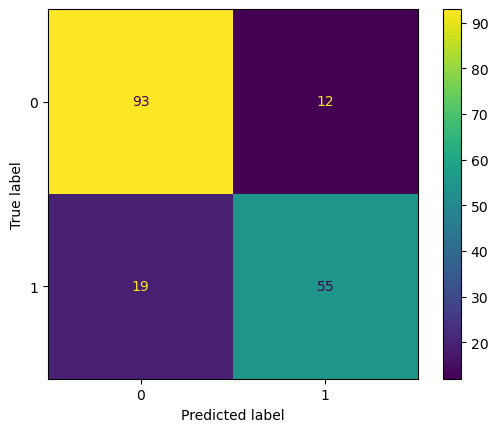

In [35]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.show()

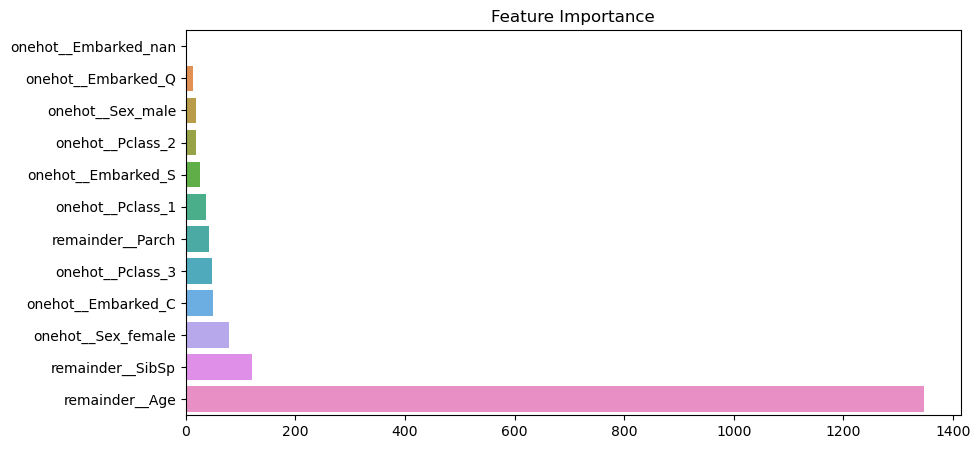

In [36]:
# Feature Importance
feature_names = preprocessor.get_feature_names_out()
feature_importance = best_model.feature_importances_


# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_names, order=np.array(feature_names)[np.argsort(feature_importance)])
plt.title("Feature Importance")
plt.show()